In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/ML-Assignment-2/Assignment2_data.csv')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   number of bedrooms                     14620 non-null  int64  
 1   number of bathrooms                    14620 non-null  float64
 2   living area                            14620 non-null  int64  
 3   lot area                               14620 non-null  int64  
 4   number of floors                       14620 non-null  float64
 5   waterfront present                     14620 non-null  int64  
 6   number of views                        14620 non-null  int64  
 7   condition of the house                 14620 non-null  int64  
 8   grade of the house                     14620 non-null  int64  
 9   Area of the house(excluding basement)  14620 non-null  int64  
 10  Area of the basement                   14620 non-null  int64  
 11  Bu

In [ ]:
data = data.drop(['id', 'Date'], axis=1)
X = data.drop('Price', axis=1).values
y = data['Price'].values.reshape(-1, 1)

In [ ]:
#Data Preprocessing
X_mean, X_std = np.mean(X, axis=0), np.std(X, axis=0)
X = (X - X_mean) / X_std
y_mean, y_std = np.mean(y), np.std(y)
y = (y - y_mean) / y_std

In [71]:
# Splitting the Dataset into train and test
ratio = 0.8


index = int(len(X) * ratio)

# Split the data into training and testing sets
X_train, X_test = X[:index], X[index:]
y_train, y_test = y[:index], y[index:]

X_train_len = len(X_train)

In [63]:
#MAE function
def mean_absolute_error(predictions, targets):
    return np.mean(np.abs(predictions - targets))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)


def mean_absolute_error(predictions, targets):
    return np.mean(np.abs(predictions - targets))

In [73]:
#Initializing the weights and bias terms with some random values
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, hidden_size)
b2 = np.zeros((1,hidden_size))

In [74]:
#Hyperparameters
input_size = X.shape[1]
hidden_size = 15
output_size = 1
lr = 0.1
epochs = 5000

In [75]:
training_loss_track = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    train_z1 = np.dot(X_train, W1) + b1
    train_a1 = sigmoid(train_z1)
    train_z2 = np.dot(train_a1, W2) + b2
    train_pred = train_z2

    # MSE
    training_loss = np.mean((train_pred - y_train)**2)
    training_loss_track.append(training_loss)

    # Backprop
    train_dz2 = 2 * (train_pred - y_train)
    train_dw2 = np.dot(train_a1.T, train_dz2)
    train_db2 = np.sum(train_dz2, axis=0, keepdims=True)
    train_dz1 = np.dot(train_dz2, W2.T) * sigmoid_derivative(train_a1)
    train_dw1 = np.dot(X_train.T, train_dz1)
    train_db1 = np.sum(train_dz1, axis=0, keepdims=True)

    # Updating weights and bias terms
    W2 -= lr * train_dw2 / X_train_len
    b2 -= lr * train_db2 / X_train_len
    W1 -= lr * train_dw1 / X_train_len
    b1 -= lr * train_db1 / X_train_len

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Training Loss: {training_loss}")

Epoch 0, Training Loss: 10.27351235798062
Epoch 100, Training Loss: 0.4672812239721407
Epoch 200, Training Loss: 0.3467529714338478
Epoch 300, Training Loss: 0.2924511886337747
Epoch 400, Training Loss: 0.25841042728334745
Epoch 500, Training Loss: 0.2351704078184424
Epoch 600, Training Loss: 0.21779958895331403
Epoch 700, Training Loss: 0.20412237091565022
Epoch 800, Training Loss: 0.19230281688383577
Epoch 900, Training Loss: 0.18082366870337402
Epoch 1000, Training Loss: 0.17020942364415997
Epoch 1100, Training Loss: 0.23971324768982716
Epoch 1200, Training Loss: 0.16562749102877047
Epoch 1300, Training Loss: 0.15682439803618
Epoch 1400, Training Loss: 0.15098819196799418
Epoch 1500, Training Loss: 0.14661447077677645
Epoch 1600, Training Loss: 0.14302191993422325
Epoch 1700, Training Loss: 0.13977108619268297
Epoch 1800, Training Loss: 0.1361635584533196
Epoch 1900, Training Loss: 0.13173893720991997
Epoch 2000, Training Loss: 0.12744489930735187
Epoch 2100, Training Loss: 0.123943

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

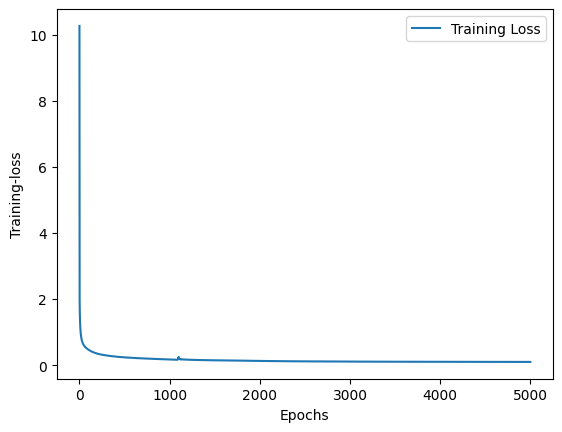

In [76]:
# Plot the training loss
plt.plot(range(epochs), training_loss_track, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training-loss')
plt.legend()
plt.show()

# Predictions in Test data
z1_test = np.dot(X_test, W1) + b1
a1_test = sigmoid(z1_test)
z2_test = np.dot(a1_test, W2) + b2
pred = z2_test


In [77]:
# Calculate Mean Squared Error on the test set
test_mse = np.mean((pred - y_test)**2)
print("MSE on Test data:", test_mse)

MSE on Test data: 0.11950183621446361
